In [1]:
# !pip install shap==0.39.0
# !pip install streamlit==1.13.0
#load in libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
import streamlit as st
import shap

In [2]:
monroe= pd.read_csv('Monroe_County_Single_Family_Residential__Building_Assets_and_Energy_Consumption__2017-2019.csv')

In [3]:
monroe.head()

,Year built range,Assessed value range,Number of stories,Square footage range,Number of bedrooms,Total number of bathrooms,Number of kitchens,Number of fireplaces,Ethnic group,Number of occupants,Median income range,NYSERDA Energy Efficiency Program Participation,Average annual electric use (MMBtu),Average annual electric use (kWh),Average annual gas use (MMBtu),Average annual total energy use (MMBtu)
0,<1945,$100k - $150k,1,"<= 1,500",1 or 2,1 or 1.5,1 or less,0,other,3 or 4 occupants,$50k - $100k,No,14.70,4309.0,104.95,119.65
1,<1945,< $100k,1,"<= 1,500",1 or 2,1 or 1.5,1 or less,0,other,3 or 4 occupants,$50k - $100k,No,10.98,3218.5,76.55,87.53
2,<1945,< $100k,1,"<= 1,500",1 or 2,1 or 1.5,1 or less,0,other,3 or 4 occupants,$50k - $100k,Yes,23.67,6938.0,64.30,87.97
3,<1945,< $100k,1,"<= 1,500",1 or 2,1 or 1.5,1 or less,0,other,3 or 4 occupants,$50k - $100k,No,18.72,5486.0,81.95,100.67
4,<1945,< $100k,1,"<= 1,500",1 or 2,1 or 1.5,1 or less,0,other,3 or 4 occupants,< $50k,Yes,12.56,3682.0,49.95,62.51


In [4]:
monroe.describe()

,Number of stories,Average annual electric use (MMBtu),Average annual electric use (kWh),Average annual gas use (MMBtu),Average annual total energy use (MMBtu)
count,55143.000000,55143.000000,55143.000000,55143.000000,55143.000000
mean,1.792902,30.833625,9036.451191,99.906596,130.740220
std,0.608729,16.592776,4862.853362,40.201414,48.417881
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.650000,5757.750000,75.100000,100.700000
50%,2.000000,27.790000,8143.500000,94.000000,124.230000
75%,2.000000,38.260000,11213.250000,117.200000,151.880000
max,3.000000,594.990000,174374.000000,1287.750000,1614.020000


In [5]:
monroe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55143 entries, 0 to 55142
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year built range                                 55143 non-null  object 
 1   Assessed value range                             55143 non-null  object 
 2   Number of stories                                55143 non-null  int64  
 3   Square footage range                             55143 non-null  object 
 4   Number of bedrooms                               55143 non-null  object 
 5   Total number of bathrooms                        55143 non-null  object 
 6   Number of kitchens                               55143 non-null  object 
 7   Number of fireplaces                             55143 non-null  object 
 8   Ethnic group                                     55143 non-null  object 
 9   Number of occupants         

In [6]:
monroe.isna().sum()

Year built range                                   0
Assessed value range                               0
Number of stories                                  0
Square footage range                               0
Number of bedrooms                                 0
Total number of bathrooms                          0
Number of kitchens                                 0
Number of fireplaces                               0
Ethnic group                                       0
Number of occupants                                0
Median income range                                0
NYSERDA Energy Efficiency Program Participation    0
Average annual electric use (MMBtu)                0
Average annual electric use (kWh)                  0
Average annual gas use (MMBtu)                     0
Average annual total energy use (MMBtu)            0
dtype: int64

## LA Data Understanding

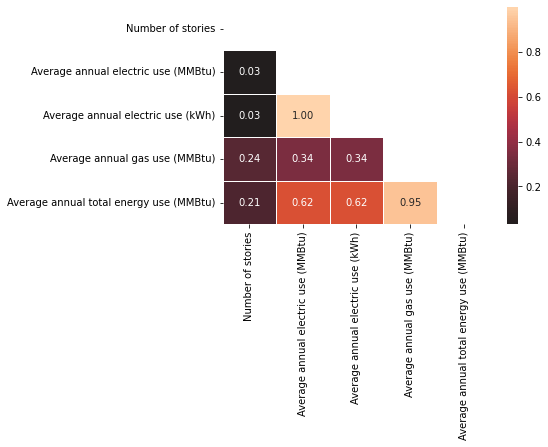

In [7]:
# Create the correlation matrix
corr = monroe.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


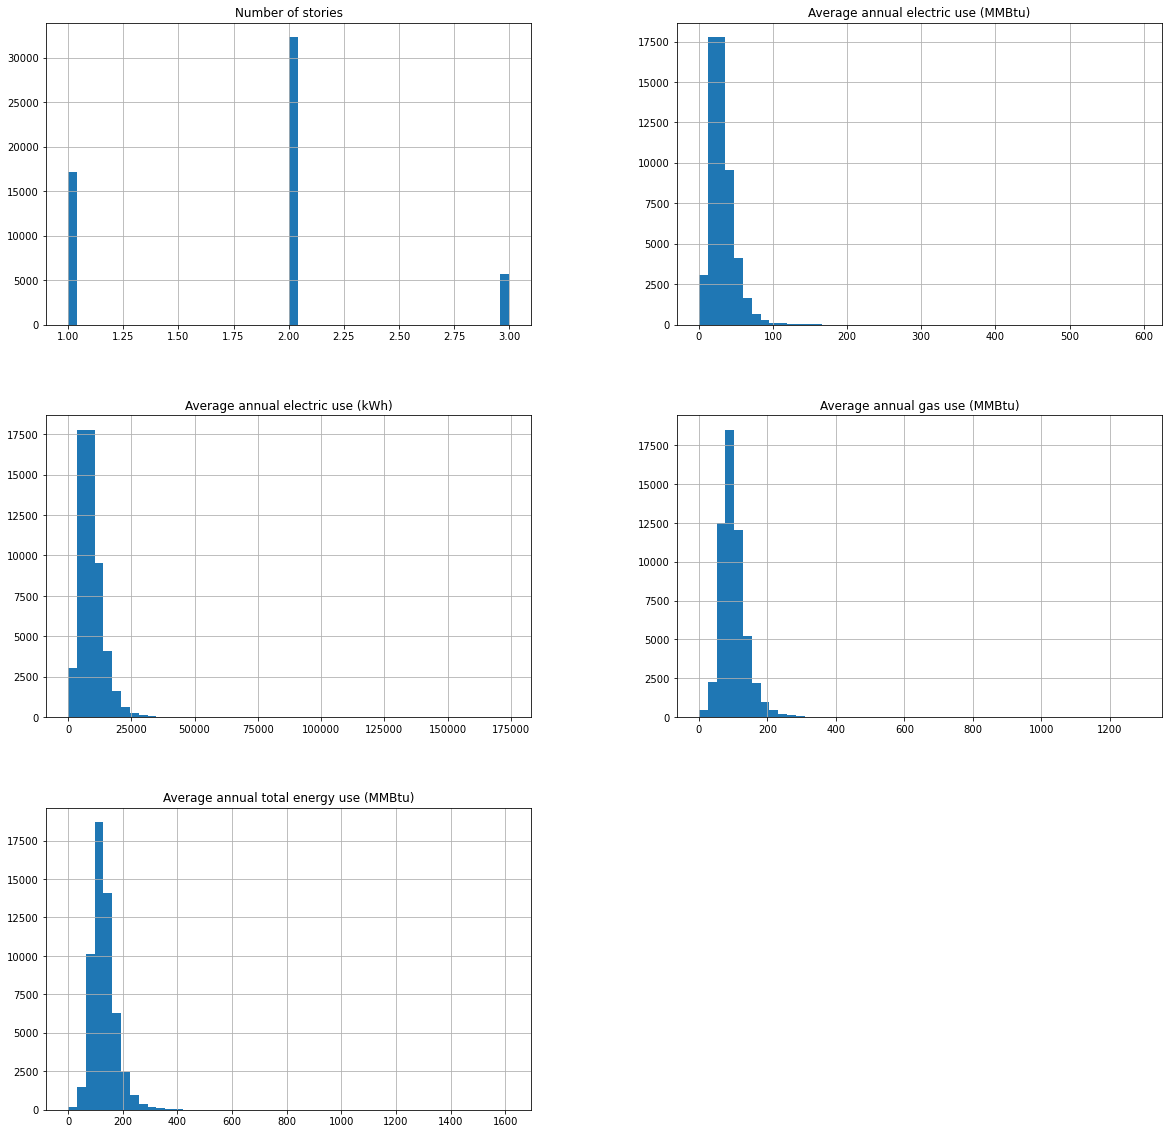

In [8]:
monroe.hist(bins=50, figsize=(20,20));

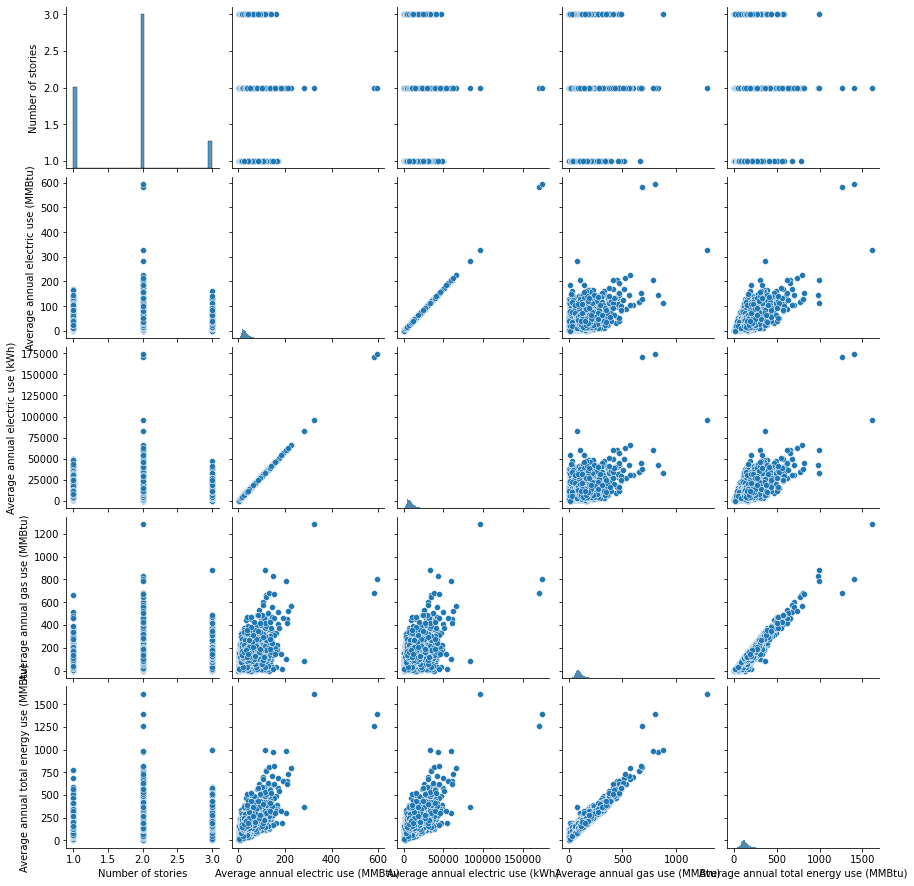

In [9]:
sns.pairplot(monroe);

## LA Data Preperation

In [10]:
# Change columnnames remove spaces and other non necessary signs to make it userfriendly
new_columns=[]
for i in list(monroe.columns):
    col = str(i).replace(' ', '_').replace('(', '').replace(')', '').lower()
    new_columns.append(col)
monroe.columns=new_columns

In [11]:
# Remove signs which ar not necessary for now
column=['assessed_value_range', 'median_income_range']
for i in column:
    monroe.loc[:,i] = monroe.loc[:,i].str.replace('$', '', regex=True).str.replace('k', '',regex=True)

In [12]:
#Change the column number of stories into object it is a category
monroe.number_of_stories=monroe.number_of_stories.astype('object')

In [13]:
# Apply onehotencoding since our model only accepts numbers not strings
monroe_dum=pd.get_dummies(monroe, drop_first=True)

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [14]:
monroe_dum.nyserda_energy_efficiency_program_participation_Yes.value_counts()

0    52360
1     2783
Name: nyserda_energy_efficiency_program_participation_Yes, dtype: int64

In [15]:
# Drop the column kwh since this column has a correlatio of 1 with mmbtu
monroe_dum=monroe_dum.drop('average_annual_electric_use_kwh', axis=1)

# Save your prepped model as csv file
monroe_dum.to_csv('Monroe_County_Single_Family_Residential__Building_Assets_and_Energy_Consumption__2017-2019_prepped.csv', index=False)
              
# Drop the column total since this one is highly correlated with average annual gas
df_model=monroe_dum.loc[:, monroe_dum.columns != 'average_annual_total_energy_use_mmbtu']

# Save columnnames in a txt file
with open("train_colnames.txt", "w") as f:
    for s in list(df_model.loc[:, df_model.columns != 
                                        'nyserda_energy_efficiency_program_participation_Yes'].columns):
        f.write(str(s) +"\n")

### Oversampling and undersampling

In [16]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_model[(df_model['nyserda_energy_efficiency_program_participation_Yes']==0)] 
df_minority = df_model[(df_model['nyserda_energy_efficiency_program_participation_Yes']==1)] 
# upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2783, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_resampled_down = pd.concat([df_majority_downsampled, df_minority])

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 10000, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_resampled_up = pd.concat([df_minority_upsampled, df_majority])

In [17]:
print(df_resampled_down['nyserda_energy_efficiency_program_participation_Yes'].value_counts())
print(df_resampled_up['nyserda_energy_efficiency_program_participation_Yes'].value_counts())

0    2783
1    2783
Name: nyserda_energy_efficiency_program_participation_Yes, dtype: int64
0    52360
1    10000
Name: nyserda_energy_efficiency_program_participation_Yes, dtype: int64


## LA Modelling

### Classification

When the target variable is a categorical variable then we refer to this task as a classification task.

Examples of classification tasks:

- Predict if a customer will churn.
- Predict if a customer will use a specific product.
- Label mails as spam.
- Label financial transactions \as fraudulent.
- Label a social media message as positive, neutral or negative.
- Predict if a customer of the bank will be able to pay back the loan.

Examples of machine learning algorithms that we could use for classification:

- Decision trees
- Random forests
- Logistic regression
- Neural networks
- Naive bayes

In [18]:
X=np.array(df_resampled_up.loc[:, df_resampled_down.columns != 'nyserda_energy_efficiency_program_participation_Yes'])
y=np.array(df_resampled_up['nyserda_energy_efficiency_program_participation_Yes']) 

In [19]:
# Import moedlling packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=23, stratify=y)

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=23)

# Fit dt_entropy to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.2f}'.format(acc_test)) 

Test set accuracy: 0.84


In [20]:
from sklearn.metrics import classification_report
# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     15708
           1       0.00      0.00      0.00      3000

    accuracy                           0.84     18708
   macro avg       0.42      0.50      0.46     18708
weighted avg       0.70      0.84      0.77     18708



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


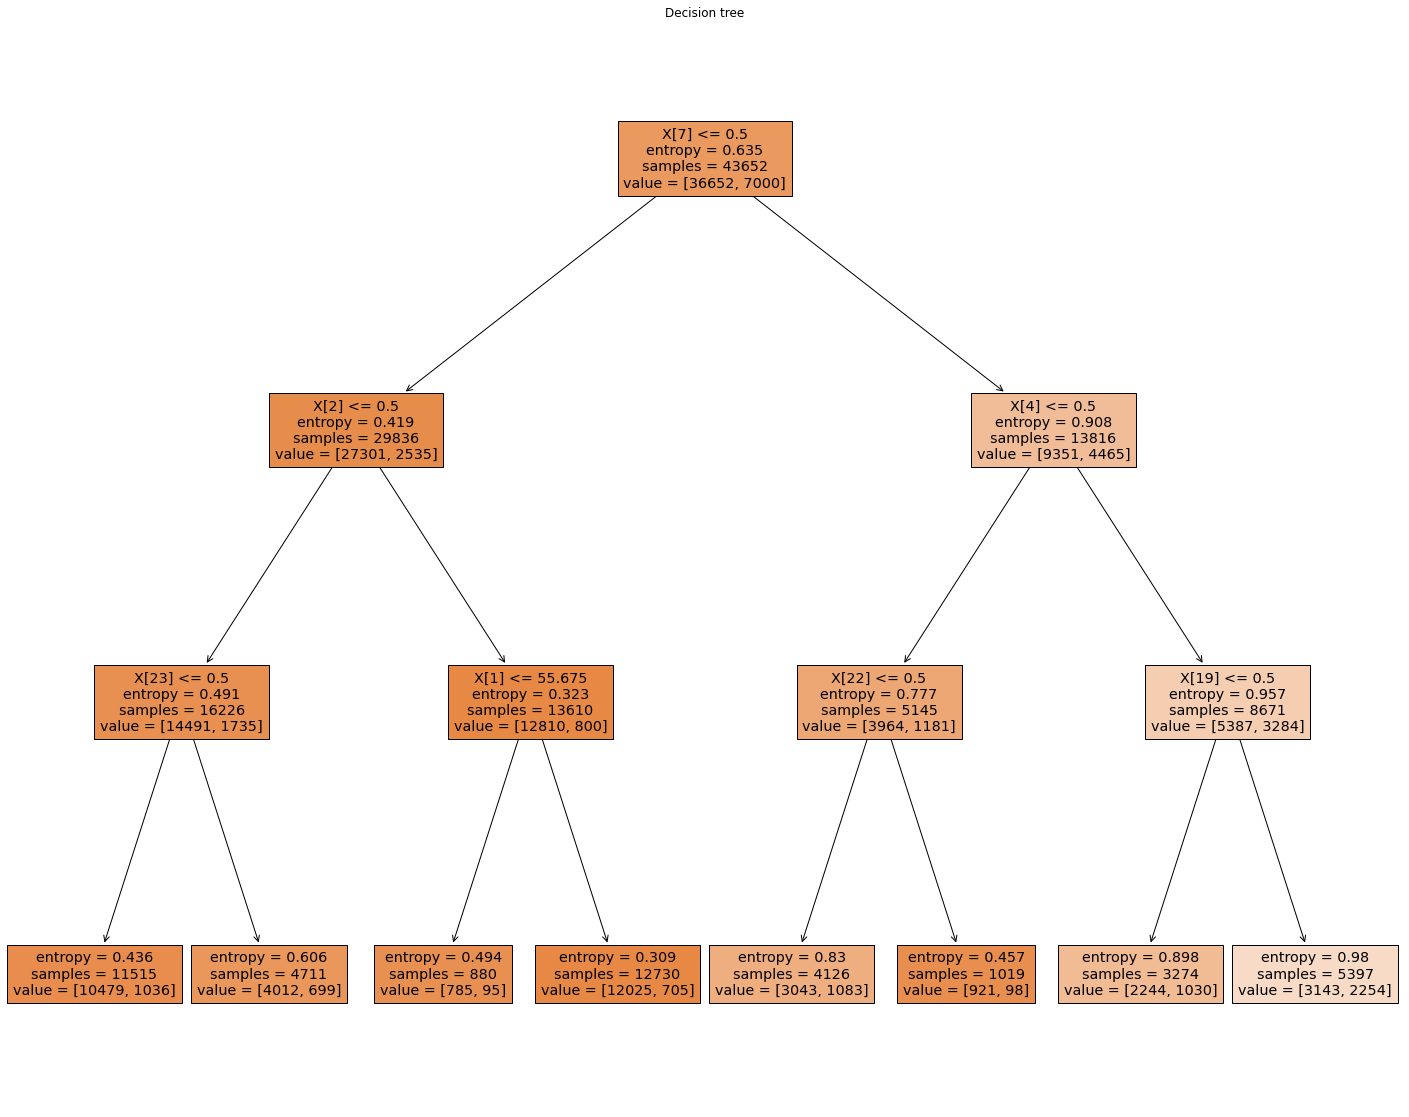

In [21]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt, filled=True)
plt.title("Decision tree")
plt.show()
fig.savefig("decistion_tree.png")

Try the follow things out:
- change the datasets so try df_modelling, df_resampled_down, df_resampled_up
- try first one column does the accuracy increase if we increase the amount of columns? </br>

<strong> overfit </strong>: use the 'df_modelling' dataset only column 'average_annual_total_energy_use_mmbtu' as feature. From depth 1 till 9 is overfit. </br>
set values = [i for i in range(1,20,5)]</br>
<strong> underfit </strong>: use the 'df_resampled_down' dataset and all columns as feature. From depth 1 till 5 is underfit. </br>
set values = [i for i in range(1,20,1)] </br>
<strong> right fit </strong>: use the 'df_resampled_up' dataset and all columns as feature.
set values = [i for i in range(1,40,3)] </br>

In [22]:
# # overfit
# X=np.array(monroe_dum.loc[:, 'average_annual_total_energy_use_mmbtu']).reshape(-1,1)
# y=np.array(monroe_dum['nyserda_energy_efficiency_program_participation_Yes']) 
# values = [i for i in range(1,20,1)]

## underfit
# X=np.array(df_resampled_down.loc[:,  df_resampled_down.columns != 'nyserda_energy_efficiency_program_participation_Yes'])
# y=np.array(df_resampled_down['nyserda_energy_efficiency_program_participation_Yes']) 
# values = [i for i in range(1,6,1)]

## right fit
X=np.array(df_resampled_up.loc[:, df_resampled_up.columns != 'nyserda_energy_efficiency_program_participation_Yes'])
y=np.array(df_resampled_up['nyserda_energy_efficiency_program_participation_Yes']) 
values = [i for i in range(1,45,2)]

>1, train: 0.840, test: 0.840
>3, train: 0.840, test: 0.840
>5, train: 0.841, test: 0.838
>7, train: 0.845, test: 0.842
>9, train: 0.857, test: 0.847
>11, train: 0.872, test: 0.854
>13, train: 0.893, test: 0.867
>15, train: 0.914, test: 0.878
>17, train: 0.934, test: 0.890
>19, train: 0.951, test: 0.900
>21, train: 0.965, test: 0.910
>23, train: 0.976, test: 0.916
>25, train: 0.983, test: 0.919
>27, train: 0.989, test: 0.925
>29, train: 0.993, test: 0.927
>31, train: 0.996, test: 0.930
>33, train: 0.998, test: 0.931
>35, train: 0.999, test: 0.933
>37, train: 1.000, test: 0.932
>39, train: 1.000, test: 0.932
>41, train: 1.000, test: 0.933
>43, train: 1.000, test: 0.933


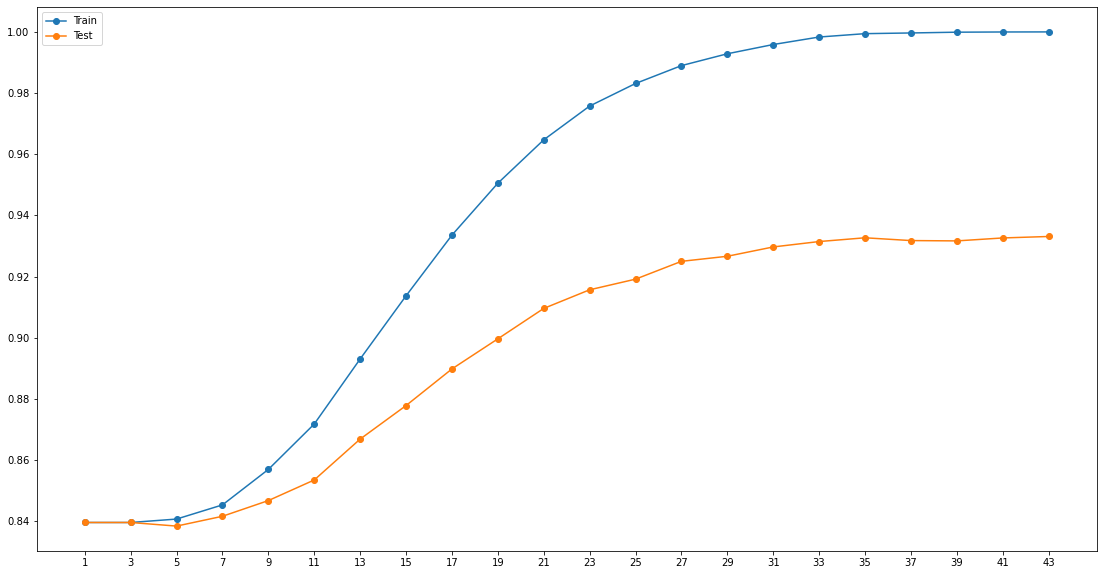

In [23]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=23, stratify=y)

# define lists to collect scores
train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.figure(figsize=(19,10))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xticks(values)
plt.legend()
plt.show()

In [24]:
print('As you can see in the graph above we will overfit the model after a depth of 31')

As you can see in the graph above we will overfit the model after a depth of 31


In [25]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt = DecisionTreeClassifier(max_depth=31, criterion='entropy', random_state=23)

# Fit dt_entropy to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate acc_test
acc_test = f1_score(y_test, y_pred)
print('Test set accuracy: {:.2f}'.format(acc_test)+'\n')

from sklearn.metrics import classification_report
# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

Test set accuracy: 0.78

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     15708
           1       0.73      0.83      0.78      3000

    accuracy                           0.92     18708
   macro avg       0.85      0.89      0.87     18708
weighted avg       0.93      0.92      0.93     18708



In [26]:
dt.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.53448276, 0.46551724],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

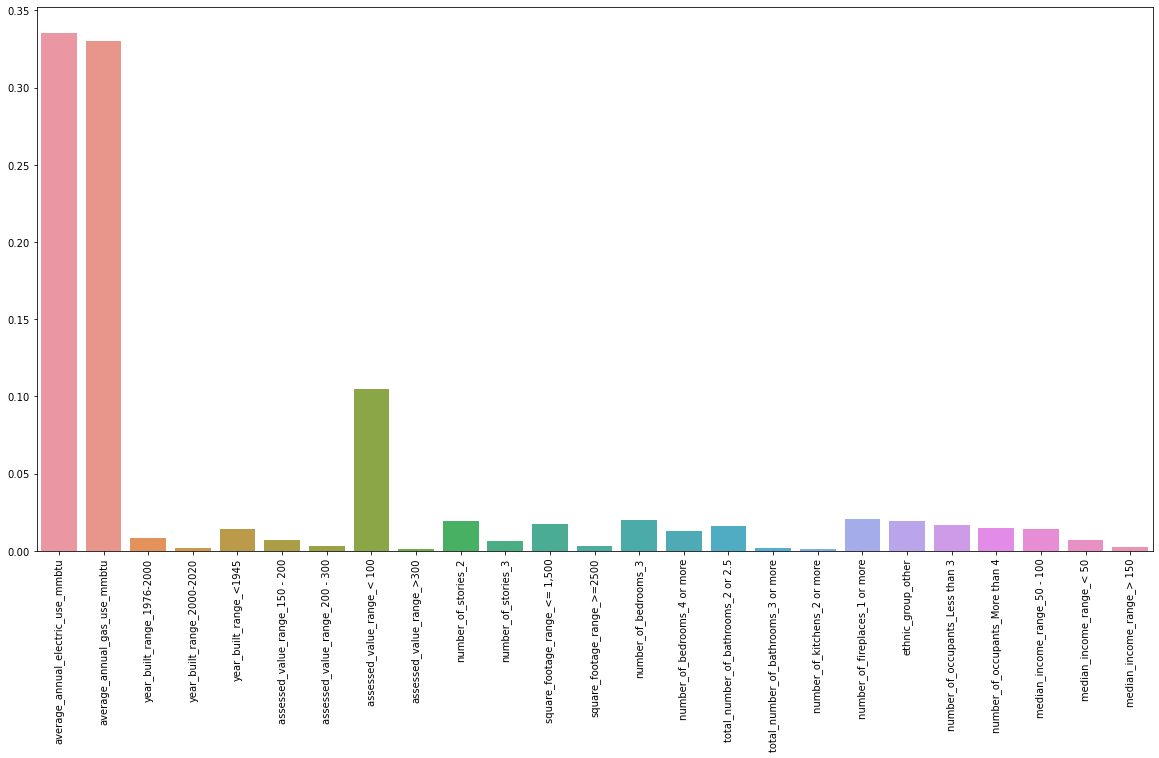

In [27]:
# Have a look at which features are the most important
fig, ax = plt.subplots(figsize=(20,10))
features=df_resampled_up.loc[:, df_resampled_up.columns != 'nyserda_energy_efficiency_program_participation_Yes'].columns
sns.barplot(x=features, 
            y=dt.feature_importances_, ax=ax)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

In [28]:
# Have a look at which top 5 features are the most important
columns=pd.DataFrame(df_resampled_up.columns)
feature_importance =pd.DataFrame(dt.feature_importances_)
frames = [columns, feature_importance]
result = pd.concat(frames,axis=1)
result.columns=['feature', 'feature_importance']
result.sort_values('feature_importance',ascending=False).head()

,feature,feature_importance
0,average_annual_electric_use_mmbtu,0.335330
1,average_annual_gas_use_mmbtu,0.329929
7,assessed_value_range_< 100,0.105022
18,number_of_fireplaces_1 or more,0.020674
13,number_of_bedrooms_3,0.019766


In [29]:
# Save your model in joblib file
from joblib import dump, load
dump(model, 'DecisionTree_avg_prec_93.joblib') 

['DecisionTree_avg_prec_93.joblib']

In [30]:
df_train=pd.DataFrame(X_train, columns=df_resampled_up.loc[:, df_resampled_up.columns != 
                                        'nyserda_energy_efficiency_program_participation_Yes'].columns)


In [31]:
# !pip install lightgbm
from pprint import pprint
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings

explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value[0]
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = df_train.iloc[select]
features_display = df_train.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)
    shap_value = explainer.shap_values(features)[0]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: 0.8396407953816549


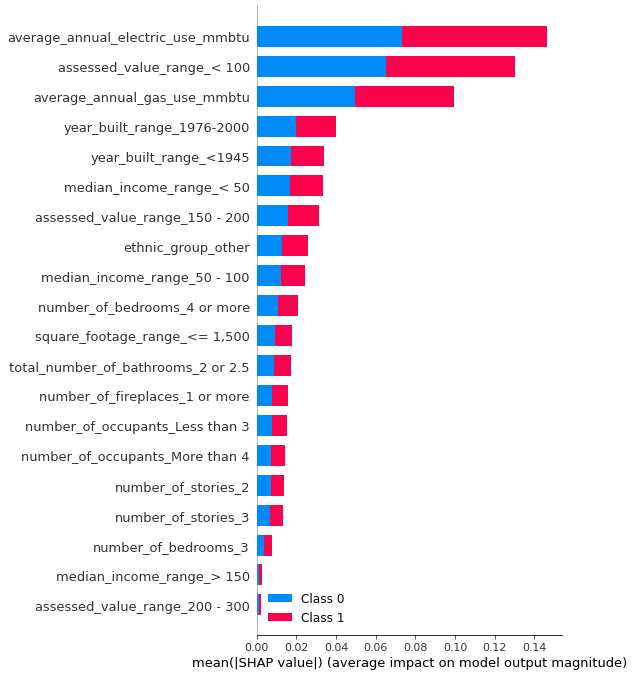

In [32]:
shap.summary_plot(shap_values, df_train, plot_type="bar")

elementwise comparison failed; this will raise an error in the future.


True


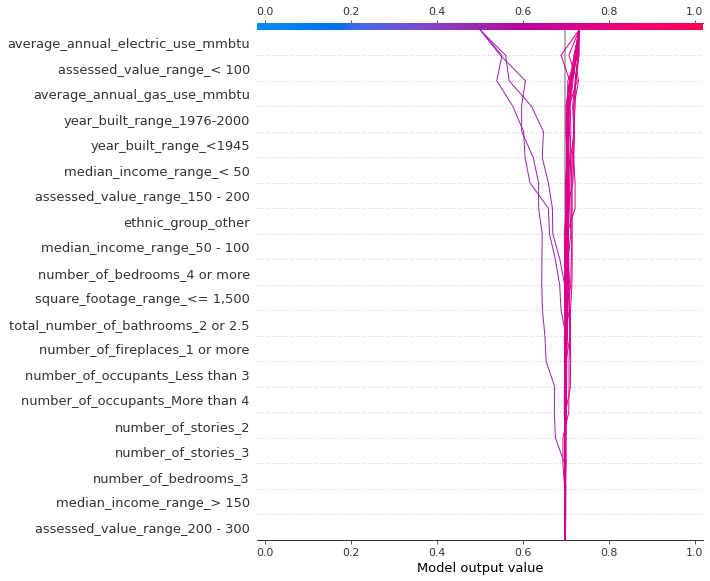

In [33]:
misclassified = y_pred != y_test[select]
print(misclassified)
shap.decision_plot(expected_value, shap_value, features_display, link='logit')

In [34]:
# explainer = shap.TreeExplainer(model)
# shap_values= explainer.shap_values(df_train)
# shap_obj = explainer(df_test)
# shap.summary_plot(shap_values, df_test, plot_type="violin")

### Regression

When the target variable is a numerical variable then we refer to this task as a regression task.

Examples of regression tasks:
- Predict the price people are willing to pay for a house.
- Predict the salary a student will earn in the future.

Examples of machine learning algorithms that we could use for regression:
- Decision trees
- Random forests
- Linear regression
- Ridge regression
- Lasso Regression
- Neural networks

In [35]:
print('The pearson correlation of annual electic use and annual total use is: {}'.
      format(np.round(monroe_dum['average_annual_electric_use_mmbtu'].corr(monroe_dum['average_annual_total_energy_use_mmbtu']),2)))

The pearson correlation of annual electic use and annual total use is: 0.62


<AxesSubplot:xlabel='average_annual_electric_use_mmbtu', ylabel='average_annual_total_energy_use_mmbtu'>

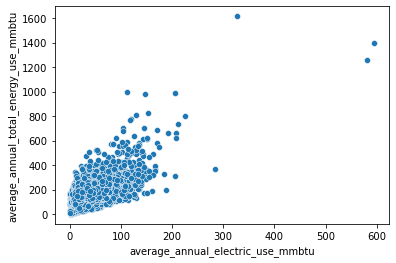

In [36]:
sns.scatterplot(x='average_annual_electric_use_mmbtu', y='average_annual_total_energy_use_mmbtu', data=monroe_dum)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create X and y arrays
X=monroe['average_annual_electric_use_mmbtu'].values.reshape(-1,1)
y=monroe['average_annual_total_energy_use_mmbtu'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, \nActual Values: {}".format(np.round(y_pred[:2], 2), np.round(y_test[:2]), 2))

# Import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(np.round(r_squared,2)))
print("RMSE: {}".format(np.round(rmse,2)))
print("MAE: {}".format(np.round(mae,2)))
print('Percentage of MAE on Mean average annual total energy use in mmbtu: {}%'.
      format(np.round(mae/(monroe['average_annual_total_energy_use_mmbtu'].mean())*100,2)))

Predictions: [101.19 238.44], 
Actual Values: [ 63. 184.]
R^2: 0.38
RMSE: 37.83
MAE: 26.76
Percentage of MAE on Mean average annual total energy use in mmbtu: 20.47%


In [52]:
# # Save your model
from joblib import dump, load
dump(reg, 'Regression.joblib')

['Regression.joblib']

## LA Prototype

In [53]:
%%writefile monroe_model.py

#pip install streamlit
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import streamlit as st
import os
from joblib import dump, load

#Load your trained models and csv file
model = load(str(str(os.getcwd())+'\DecisionTree_avg_prec_93.joblib'))
reg = load(str(str(os.getcwd())+'\Regression.joblib'))
df= pd.read_csv(str(str(os.getcwd())+'\Monroe_County_Single_Family_Residential__Building_'
                        'Assets_and_Energy_Consumption__2017-2019_prepped.csv'))

# Define your target values (y) and your features (df_un) often X
y='nyserda_energy_efficiency_program_participation_Yes';
df_dt=df.loc[:, df.columns != y]; # exclude the target value
df_dt= df_dt.loc[:, df_dt.columns != 'average_annual_total_energy_use_mmbtu']; #exclude the total energy column

# Create a dropdown box on your main paige
page = st.sidebar.selectbox("""
        Hello there! I’ll guide you!
         Please select model""",
         ["Main Page",
            "Classification",
            "Linear Regression",])

# Import an image on your main page
st.image('https://www.albireoenergy.com/wp-content/uploads/2017/02/NYSERDA.jpg')

# Main page
if page == "Main Page":
    st.subheader('About NYSERDA')
    st.write('Clean energy can power New York while protecting the environment. The New York State Energy Research and Development '
         'Authority, known as NYSERDA, promotes energy efficiency and the use of renewable energy sources. These efforts are key '
         'to developing a less polluting and more reliable and affordable energy system for all New Yorkers. Collectively, NYSERDA’s '
         'efforts aim to reduce greenhouse gas emissions, accelerate economic growth, and reduce customer energy bills.')
    st.subheader('About the Dataset')
    st.write('This aggregated and anonymized dataset of single-family residential building asset attributes and observed average '
         'annual energy consumption over the 2-year period from August 2017 through July 2019 is available for Monroe County.The '
         'dataset includes more than 55,000 properties from the study’s matched residential dataset that had sufficient data for '
         'calculation of average annual energy consumption ')

# Classificatie page
elif page == 'Classification':
    st.title('Can we predict if a househould is willing to contribute to NYSERDA?')
    st.write("Select the corresponding values on the left to do a prediction about the probability that the "
             "houshold will take part of the NSYERDA research.")
    year_built_range_var = st.sidebar.select_slider( ' year_built_range ' , ['<1945', '1945-1975', '1976-2000', '2000-2020'] )
    assessed_value_range_var = st.sidebar.select_slider( ' assessed_value_range ' , ['< 100','100 - 150',  '150 - 200', '200 - 300', '>300'] )
    number_of_stories_var = st.sidebar.number_input( ' number_of_stories ' , 1 , 3 )
    square_footage_range_var = st.sidebar.select_slider( ' square_footage_range ' , ['<= 1,500', '1500 - 2500', '>=2500'] )
    number_of_bedrooms_var = st.sidebar.select_slider( ' number_of_bedrooms ' , ['1 or 2', '3', '4 or more'] )
    total_number_of_bathrooms_var = st.sidebar.select_slider( ' total_number_of_bathrooms ' , ['1 or 1.5', '2 or 2.5', '3 or more'] )
    number_of_kitchens_var = st.sidebar.select_slider( ' number_of_kitchens ' , ['1 or less', '2 or more'] )
    number_of_fireplaces_var = st.sidebar.select_slider( ' number_of_fireplaces ' , ['0', '1 or more'] )
    ethnic_group_var = st.sidebar.select_slider( ' ethnic_group ' , ['other', 'Western European'] )
    number_of_occupants_var = st.sidebar.select_slider( ' number_of_occupants ' , ['Less than 3','3 or 4 occupants',  'More than 4'] )
    median_income_range_var = st.sidebar.select_slider( ' median_income_range ' , ['< 50', '50 - 100', '100 - 150', '> 150'] )
    average_annual_electric_use_mmbtu_var = st.sidebar.number_input( ' average_annual_electric_use_mmbtu ' , 0.0 , 594.99 )
    average_annual_gas_use_mmbtu_var = st.sidebar.number_input( ' average_annual_gas_use_mmbtu ' , 0.0 , 1287.75 )
    var = [year_built_range_var, assessed_value_range_var, number_of_stories_var,
           square_footage_range_var,  number_of_bedrooms_var,total_number_of_bathrooms_var,
           number_of_kitchens_var, number_of_fireplaces_var, ethnic_group_var, number_of_occupants_var,
           median_income_range_var, average_annual_electric_use_mmbtu_var,average_annual_gas_use_mmbtu_var]

    column= ['number_of_stories', 'average_annual_electric_use_mmbtu', 'average_annual_gas_use_mmbtu',
           'year_built_range', 'assessed_value_range',  'square_footage_range',
           'number_of_bedrooms', 'total_number_of_bathrooms', 'number_of_kitchens', 'number_of_fireplaces', 'ethnic_group',
           'number_of_occupants', 'median_income_range'];
    
    columnames_onehot = []
    with open("train_colnames.txt", "r") as f:
          for line in f:
                columnames_onehot.append(str(line.strip()))

    if st.sidebar.button('Predict'):
        dic={}
        for i in range(0,len(column)):
            dic[str(column[i])] = var[i]
        X_unseen = pd.DataFrame.from_dict([dic])
        X_unseen = pd.get_dummies(X_unseen).reindex(columns=columnames_onehot, fill_value=0)
        
        prediction=model.predict(np.array(X_unseen))[0]
        
        pred_prob = model.predict_proba(X_unseen)
        
        if prediction == 0:
            st.success(f"There is a chance of {pred_prob[0][0] * 100}% that the this household joins NSYERDA ")
        else:
            st.error(
                f"There is a chance of {pred_prob[0][1] * 100}% that this households does not join NSYERDA")

    st.sidebar.text("")

# Regression page
elif page == 'Linear Regression':
    st.title('Can we predict the total average energy used through a household based on the average annual electric usage?')
    average_annual_electric_use_mmbtu_var = st.number_input('Insert the average annual electric use in mmbtu ', 0.0, 594.99)

    if st.button('Predict'):
        prediction_lin= reg.predict(np.array(average_annual_electric_use_mmbtu_var).reshape(-1,1))
        st.write('The prediction of average total energy use in mmbtu is between the {} '.format(
            np.round(prediction_lin[0] - 26.76), 2), 'and the {}' .format(np.round(prediction_lin[0] + 26.76), 2))

Overwriting monroe_model.py


In [ ]:
!streamlit run monroe_model.py & npx localtunnel --port 8501